<a href="https://colab.research.google.com/github/nitinware/GoogleCloabNotebooks/blob/master/coursera/Intro_TF/week3_conv2d_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.4.0


In [27]:
mnist = tf.keras.datasets.fashion_mnist

In [28]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [29]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

In [30]:
test_images = test_images / 255.0

In [55]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(120, activation=tf.nn.relu),
  tf.keras.layers.Dense(120, activation=tf.nn.softmax)
])

In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               192120    
_________________________________________________________________
dense_13 (Dense)             (None, 120)              

In [ ]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.7439 - accuracy: 0.7504
Epoch 2/5
1146/1875 [=================>............] - ETA: 28s - loss: 0.3391 - accuracy: 0.8761

In [53]:
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [54]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 7.0547 - accuracy: 0.1000


In [37]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


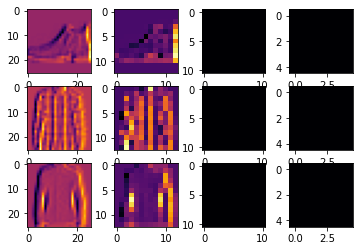

In [44]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26

CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0, 4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)